<a href="https://colab.research.google.com/github/bonniesh/test/blob/main/project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Do a scatterplot of the left telencephalon **(type 1 level 1) volume** by the right. The kirby 21 dataset can be found [here](https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv) 
2. Create a vector of the left telencelphalon **(type 1 level 1) volume** values and the right. Demean each. Fit a regression through the origin model with the left telecephalon as the outcome and the right as the predictor. Also do the same with the left as the predictor and the right as the outcome. Plot the fitted lines on your scatterplot. 
3. Consider a regression through the origin model $Y=BX$. What would be the impact on the estimate of $B$ if we replaced $X$ by $cX$ where $c$ is a positive constant?
4. Let $X_i$ be a group indicator so that 
$$
X_i = I(i \in G_1)
$$
I.e. takes the value $1$ when $i$ is in group 1 and 0 if $i$ is in group 0. Consider optimizing 
$$
\sum_{i=1}^n (Y_i - \beta_0 - \beta_1 X_i)^2.
$$
If $\hat Y = \hat \beta_0 + \hat \beta_1 X$ argue that $\hat Y$ is the group mean for group 1 if $X=1$ and the group mean for group 0 if $X=0$. 
5. Write a python function that takes an X and Y vector and returns an estimated $\beta_0$ and $\beta_1$ from linear regression using only basic functions such as mean, sd and correlation.
6. Consider the Kirby 21 data. Plot a scatter plot of the left diencephalon (type 1 level 1) and the right. Find the best line fit for predicting the right using the left. Plot the line on the scatterplot. Find the best fit line for predicting the left using the right as a predictor. Plot this on the same plot.
7. Argue that if you take the vectors $Y$ and $X$ and divide them by their standard deviations (respectively), the slope for either regressing $Y$ on $X$ or $X$ on $Y$ is simply the correlation. 

    volume_x   id  volume_y
0     531111  127    543404
1     545603  142    552216
2     483107  239    490805
3     558849  346    568830
4     509945  422    518902
5     538936  492    541024
6     506151  501    516742
7     457862  505    461817
8     551654  656    570542
9     482556  679    490654
10    483496  742    488470
11    373246  800    380492
12    526596  814    543440
13    468915  815    473350
14    516579  849    519582
15    467063  906    470488
16    486629  913    495646
17    557758  916    572435
18    468971  934    476112
19    512967  959    519178


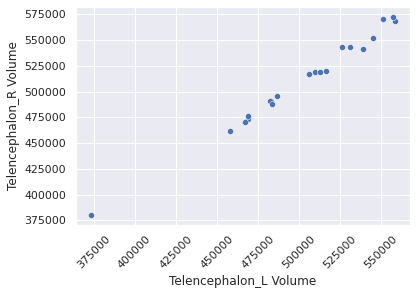

In [5]:
import numpy as np
from scipy import stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
## this sets some style parameters
sns.set()

## Read in the data and display a few rows
dat = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv")

## Remove the unnecessary columns
dat = dat.drop(['Unnamed: 0', 'rawid', 'min', 'max', 'mean', 'std', 'icv', 'tbv'],\
             axis = 1)

## Extract the Type 1 Level 1 data
t1l1 = dat.loc[(dat.type == 1) & (dat.level == 1)]
## transpose data
left = pd.DataFrame(t1l1.loc[t1l1['roi']== 'Telencephalon_L', ['volume','id']])
right = pd.DataFrame(t1l1.loc[t1l1['roi']== 'Telencephalon_R', ['volume','id']])
df = pd.DataFrame()
df = pd.merge(left, right, on="id")
print(df)
## Scatterplot
plot = sns.scatterplot(data = df, x = 'volume_x', y = 'volume_y')
plt.setp(plot.get_xticklabels(), rotation=45)
plot.set_xlabel('Telencephalon_L Volume')
plot.set_ylabel('Telencephalon_R Volume')
plt.show()

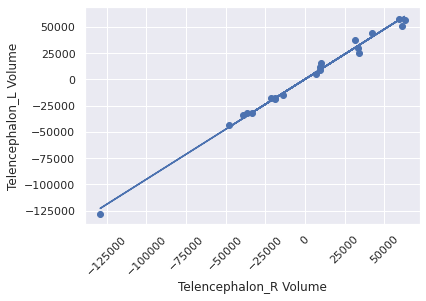

beta0 = 0.9500552111008125 , error = 2.6800651846718097e-22


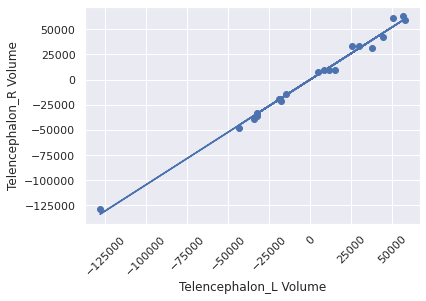

beta0 = 1.0442415398322409 , error = 3.308722450212111e-24


In [2]:
import pylab as plab
l = np.array(df['volume_x'])
r = np.array(df['volume_y'])
mean_l = l.mean()
mean_r = r.mean()
dl = l-mean_l
dr = r-mean_r

def lin_fit(x,y,z):
  beta0 = sum(x*y)/sum(x**2)
  error = sum(y-beta0*x)**2
  plt.scatter(x,y)
  plt.plot(x, beta0*x )
  plt.xticks(rotation=45)
  plt.xlabel(z[0])
  plt.ylabel(z[1])
  plt.show()
  print('beta0 =', beta0,',', 'error =',error)

lin_fit(dr,dl,['Telencephalon_R Volume', 'Telencephalon_L Volume'])
lin_fit(dl,dr,['Telencephalon_L Volume', 'Telencephalon_R Volume'])

Q3: Answer: :\
Because C is a constant, we can define $$ Y = B_1Z, where Z = cX$$ Since $\hat B_1 = \frac{\sum y_iz_i}{\sum z_i^2}$ for $ Y = B_1Z$, the new $$ \hat B_1 = \frac{\sum y_i(cx_i)}{\sum (cx_i)^2} = \frac{c \sum y_ix_i}{c^2 \sum (x_i)^2} = \frac{1}{c} \frac{\sum y_ix_i}{\sum (x_i)^2} = \frac{1}{c} B$$ Therfore, the new $B_1$ will be $\frac{1}{c}$ of $B$. 

Q4: Answer \
From a regression through the origin model $𝑌=𝐵𝑋$, we know $\beta_1$. We can rewrite the equation as $ \hat Y = \sum (Z_i - \beta_0)^2$ where $Z = y_i- \beta_1x_i$. Then $\hat \beta_0 = \bar Z = \frac{\sum(y_i-\beta_1x_i)}{n} = \bar y_i - \beta_1 \bar x_i$. \
$$ \hat Y = \hat \beta_0 + \hat \beta_1 X$$
$$\hat Y = (\bar y_i -\beta_1 \bar x_i) + \hat \beta_1 X$$
When $ X = 0$, $\hat Y = \bar y_0$. When $ X = 1$, $\hat Y = \bar y_1$.

In [49]:
#Q5: Write a python function that takes an X and Y vector and returns an estimated 
# 𝛽0  and  𝛽1  from linear regression using only basic functions such as mean, sd and correlation.

def lin_reg(X,Y):
  beta1 = st.pearsonr(X,Y)[0] * np.std(Y) / np.std(X)
  beta0 = Y.mean()-beta1*Y.mean()
  return (beta0, beta1)


       volume
2        9683
838      9156
1674     8937
2510     8828
3346     9749
4182    10023
5018     9315
5854     8120
6690     9519
7526     8996
8362     9035
9198     7066
10034    9107
10870    8992
11706    9072
12542    8801
13378   10137
14214    9552
15050    7396
15886    8634
1198.079450469113 0.8681422329073245
-608.5086083513179 1.0675677731655158


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


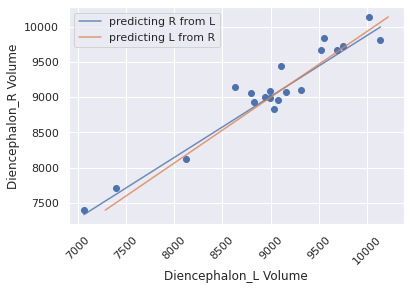

In [60]:
#Q6:
l_d = pd.DataFrame(t1l1.loc[t1l1['roi']== 'Diencephalon_L', ['volume']])
r_d = pd.DataFrame(t1l1.loc[t1l1['roi']== 'Diencephalon_R', ['volume']])
print(l_d)
plt.scatter(l_d['volume'], r_d['volume'])
b0, b1 = lin_reg(l_d['volume'],r_d['volume'])
print(b0, b1)
b3, b4 = lin_reg(r_d['volume'],l_d['volume'])
print(b3,b4)
sns.lineplot(l_d['volume'], b0 + b1 * l_d['volume'], alpha = 0.8)
sns.lineplot(b3 + b4 * r_d['volume'], r_d['volume'], alpha = 0.8 )
plt.xticks(rotation=45)
plt.xlabel('Diencephalon_L Volume')
plt.ylabel('Diencephalon_R Volume')
plt.legend(['predicting R from L', 'predicting L from R'])
plt.show()

Q7 Answer \
The slope of the regression when $Y$ regress on $X$ is $ \beta_1 = correlation (x,y) * \frac {std(y)}{std(x)}$ while the slope for $X$ regress on $Y$ is $ \beta_1 = correlation (x,y) * \frac {std(x)}{std(y)}$. \
If we divide $X$ by std(x) and $Y$ by std(y), then the standardized $X$ and $Y$ will have same standard deviation (both equal to 1), which means both $\frac {std(y)}{std(x)} = 1$ and $\frac {std(x)}{std(y)} = 1$. Therefore, the resulting slope of either regressing $Y$  on  $X$  or  $X$  on  $Y$  is simply the correlation between $X$ and $Y$. 